# Time Series Forecasting of Stock Market Data with ARIMA in Python


# 1. Time Series Data
`Time series` data is a type of data that is collected over time at regular intervals. It is a sequence of data points that are ordered chronologically and can be used to analyze trends, patterns, and behaviors over time. Time series data can be collected from a variety of sources, such as sensors, financial markets, weather stations, and social media platforms.

Examples of time series data include stock prices, temperature readings, website traffic, and sales data. Time series data can be analyzed using various statistical and machine learning techniques, such as regression analysis, ARIMA models, and deep learning models.

Time series data is often used in forecasting and prediction applications, where the goal is to predict future values based on past observations. Time series analysis can also be used to identify anomalies, trends, and seasonality in the data, which can provide insights into the underlying processes that generate the data.

`Overall,` time series data is an important type of data that is used in many different fields, including finance, economics, engineering, and social sciences.

- `Time series` data is a sequence of data points collected over time that can be used to analyze trends and patterns. It can be collected from various sources and analyzed using statistical and machine learning techniques. 
- `Time series forecasting` is the process of predicting future values based on past observations. Time series data is used in many different fields, including finance, economics, engineering, and social sciences.

# Stock Market Data scraping in Python

In [1]:
# imporot libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
date.today()

datetime.date(2025, 6, 2)

In [3]:
# define the dates to fetch data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print("Your data will be between these dates: ", start_date, end_date)

Your data will be between these dates:  2024-06-02 2025-06-02


In [4]:
# deifne the ticker
ticker = 'GOOGL'

df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()

YF.download() has changed argument auto_adjust default to True


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2024-06-03,172.346024,173.699553,170.345593,171.719016,27459100
2024-06-04,172.963074,173.022801,171.072120,172.455506,26879600
2024-06-05,174.575363,175.809453,173.102394,174.366356,22068500
2024-06-06,175.889069,176.307068,174.913736,175.063016,23251000
2024-06-07,173.629898,177.023661,173.470656,176.207571,19661400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2024-06-03 to 2025-05-30
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   249 non-null    float64
 1   (High, GOOGL)    249 non-null    float64
 2   (Low, GOOGL)     249 non-null    float64
 3   (Open, GOOGL)    249 non-null    float64
 4   (Volume, GOOGL)  249 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [6]:
df.insert(0, "Date", df.index, True)
# df["Date"] = df.index
df.reset_index(drop=True, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   (Date, )         249 non-null    datetime64[ns]
 1   (Close, GOOGL)   249 non-null    float64       
 2   (High, GOOGL)    249 non-null    float64       
 3   (Low, GOOGL)     249 non-null    float64       
 4   (Open, GOOGL)    249 non-null    float64       
 5   (Volume, GOOGL)  249 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


In [8]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
0,2024-06-03,172.346024,173.699553,170.345593,171.719016,27459100
1,2024-06-04,172.963074,173.022801,171.072120,172.455506,26879600
2,2024-06-05,174.575363,175.809453,173.102394,174.366356,22068500
3,2024-06-06,175.889069,176.307068,174.913736,175.063016,23251000
4,2024-06-07,173.629898,177.023661,173.470656,176.207571,19661400


In [9]:
df.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
count,249,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,2024-11-29 23:07:57.108433664,171.927874,174.004292,170.001185,171.993254,2.996966e+07
min,2024-06-03 00:00:00,144.699997,148.949997,140.529999,141.550003,1.024210e+07
25%,2024-08-30 00:00:00,162.556259,164.461884,161.039993,162.819103,2.048670e+07
50%,2024-11-27 00:00:00,168.916992,170.630005,167.440002,169.041361,2.572910e+07
75%,2025-03-03 00:00:00,181.491348,183.623602,180.644432,181.969608,3.427560e+07
max,2025-05-30 00:00:00,206.142593,206.811821,202.576693,203.156027,1.274901e+08
std,NaN,13.270240,13.161205,13.295872,13.119298,1.425117e+07


In [85]:
# %pip install nbformat

In [10]:
# Flatten MultiIndex columns
df.columns = ['_'.join(col).strip('_') for col in df.columns]

# Rename specific column for plotting
df = df.rename(columns={f'Close_{ticker}': 'Close'})

# Plot using plotly
fig = px.line(df, x='Date', y='Close', title=f'{ticker} Stock Price')
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Stock Price (USD)',
    template='plotly_dark'
)
fig.show()


In [11]:
# Rename columns to standard names for plotting
df = df.rename(columns={
    'D_______a_______t_______e': 'Date',
    'C_______l_______o_______s_______e': 'Close'
})

# Plot the graph
fig = px.line(df, x='Date', y='Close', title=f'{ticker} Stock Price')
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Stock Price (USD)',
    template='plotly_dark'
)
fig.show()

In [12]:
# select columns
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2024-06-03,172.346024
1,2024-06-04,172.963074
2,2024-06-05,174.575363
3,2024-06-06,175.889069
4,2024-06-07,173.629898


In [90]:
# # plot the data to see how it looks like using plotly
# fig = px.line(df, x='Date', y=df.columns, title= 'stock Price')
# fig.update_layout(xaxis_title='Date', yaxis_title='Stock Price (USD)')
# fig.show()

#

In [13]:
# stationarity check on data
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to reject the null hypothesis. Data is not stationary")

adf_test(df['Close'])

ADF Statistic: -2.028989
p-value: 0.274009
Fail to reject the null hypothesis. Data is not stationary


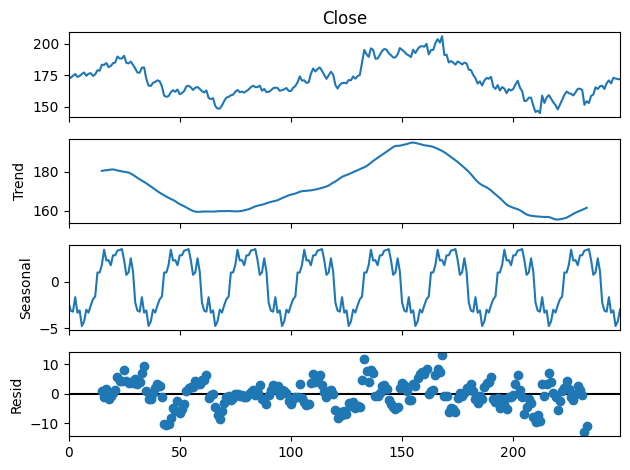

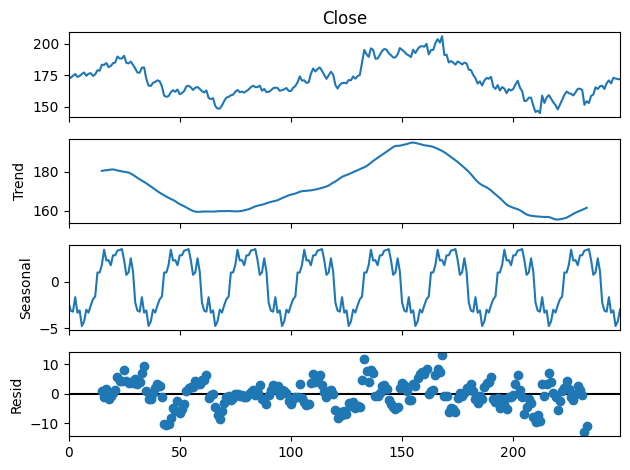

In [14]:
# decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'], model='additive', period=30)
decompose.plot()

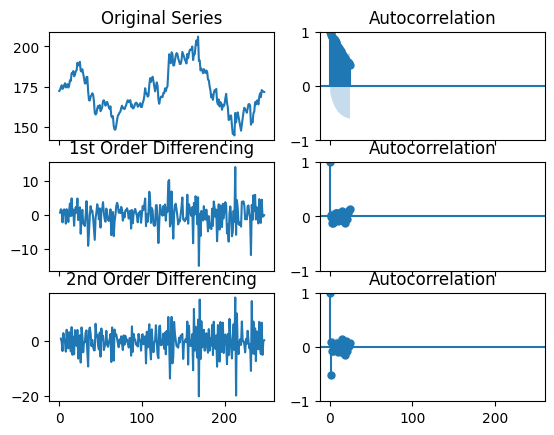

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

`d = 1`

# Lets find `p` value

In [16]:
df = df.rename(columns={f'Close': 'Close_GOOGL'})

In [17]:
# plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# pd.plotting.autocorrelation_plot(df['Close'])

# plot_acf(df['Close'], alpha=0.05)

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close_GOOGL']))
print(x_acf)

           0
0   1.000000
1   0.967082
2   0.934915
3   0.900891
4   0.874677
5   0.856815
6   0.838092
7   0.816338
8   0.790911
9   0.761023
10  0.726364
11  0.697075
12  0.671073
13  0.647744
14  0.621296
15  0.595464
16  0.563011
17  0.536190
18  0.512050
19  0.486821
20  0.469725
21  0.451184
22  0.435306
23  0.415546


`p = 2`

# Lets find `q` value

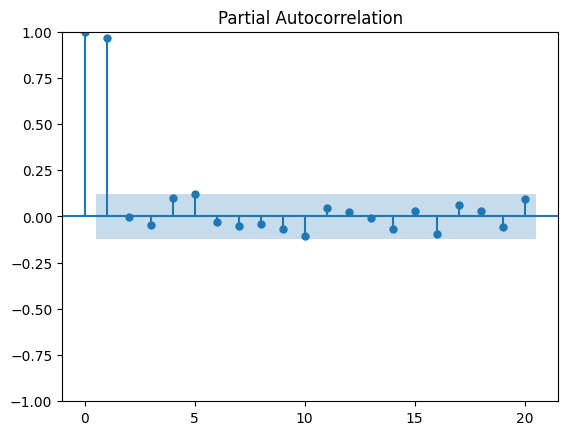

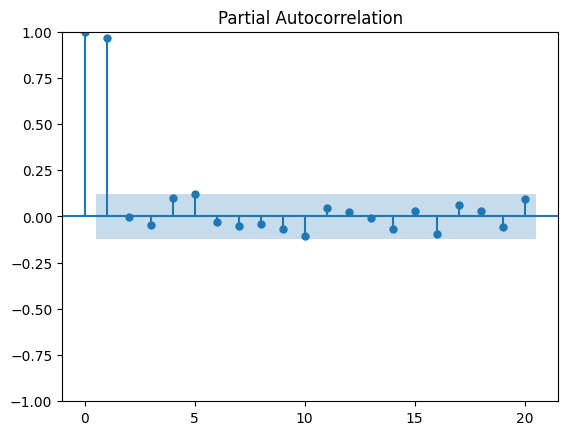

In [18]:
# partial autocorrelation
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['Close_GOOGL'], lags=20, alpha=0.05)

In [19]:
# lets define p, d, q
p = 2
d = 1
q = 2

In [124]:
# Ensure compatible versions of numpy, scipy, statsmodels, and pmdarima
# %pip install --upgrade numpy scipy statsmodels pmdarima

`Important Note`: The Pmdarima library work with if your numpy library is 1.26.4 

In [22]:
# Ensure compatible versions of numpy, scipy, statsmodels, and pmdarima
# %pip install --upgrade numpy scipy statsmodels pmdarima
import warnings
warnings.filterwarnings("ignore")
from pmdarima.arima import auto_arima

model = auto_arima(
    df['Close_GOOGL'],
    start_p=1, start_q=1, max_p=2, max_q=2,
    m=12, start_P=0, seasonal=True, d=1, D=1,
    trace=True, error_action='ignore', suppress_warnings=True
)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.99 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1429.654, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1335.137, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1431.648, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1312.471, Time=0.62 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.45 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1283.379, Time=0.85 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=1284.335, Time=3.66 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1283.850, Time=1.98 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=9.26 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1281.486, Time=0.59 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1333.6

In [25]:
# lets run arima with pmdarima
from pmdarima.arima import auto_arima

model = auto_arima(df['Close_GOOGL'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.31 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1429.654, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1335.137, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1431.648, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1312.471, Time=0.62 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.54 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1283.379, Time=0.85 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=1284.335, Time=3.45 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1283.850, Time=2.23 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=9.29 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1281.486, Time=0.57 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1333.6

In [26]:
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  249
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -637.743
Date:                              Mon, 02 Jun 2025   AIC                           1281.486
Time:                                      12:04:53   BIC                           1291.878
Sample:                                           0   HQIC                          1285.675
                                              - 249                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1457      0.082     -1.778      0.075      -0.306       0.015
ma.S.L12      -0.84

In [27]:
model = auto_arima(df['Close_GOOGL'], seasonal=True, suppress_warnings=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  249
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -657.165
Date:                Mon, 02 Jun 2025   AIC                           1320.330
Time:                        12:05:10   BIC                           1330.883
Sample:                             0   HQIC                          1324.578
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.2580      2.254      2.776      0.005       1.840      10.676
ar.L1          0.9636      0.013     74.524      0.000       0.938       0.989
sigma2        11.3585      0.716     15.868      0.0

In [28]:
df = df.rename(columns={'Close_GOOGL': 'Close'})

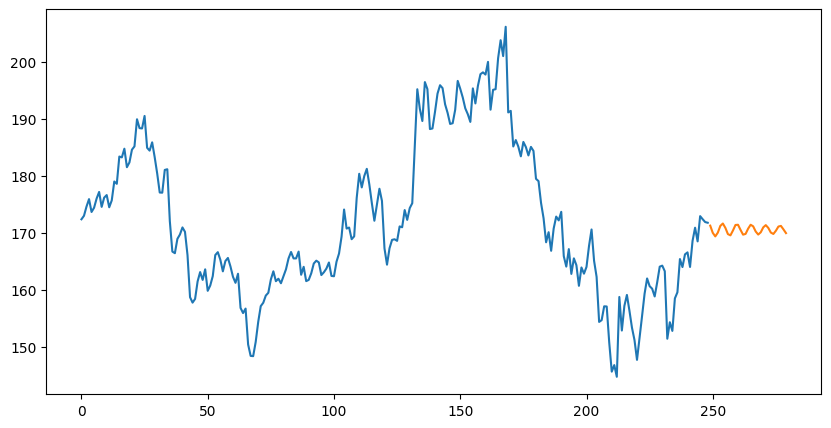

In [29]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 1, 2

model = ARIMA(df['Close'], order=(p, d, q))
model = model.fit()
# print(model.summary())

# predict next 30 days
forecast = model.predict(len(df["Close"]), len(df['Close'])+30)
# print(forecast)

#plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

In [30]:
# let's run SARIMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

p , d, q = 2, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  249
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -634.001
Date:                            Mon, 02 Jun 2025   AIC                           1286.001
Time:                                    13:29:27   BIC                           1317.176
Sample:                                         0   HQIC                          1298.568
                                            - 249                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6321      0.084     -7.502      0.000      -0.797      -0.467
ar.L2         -0.8670      0.074   

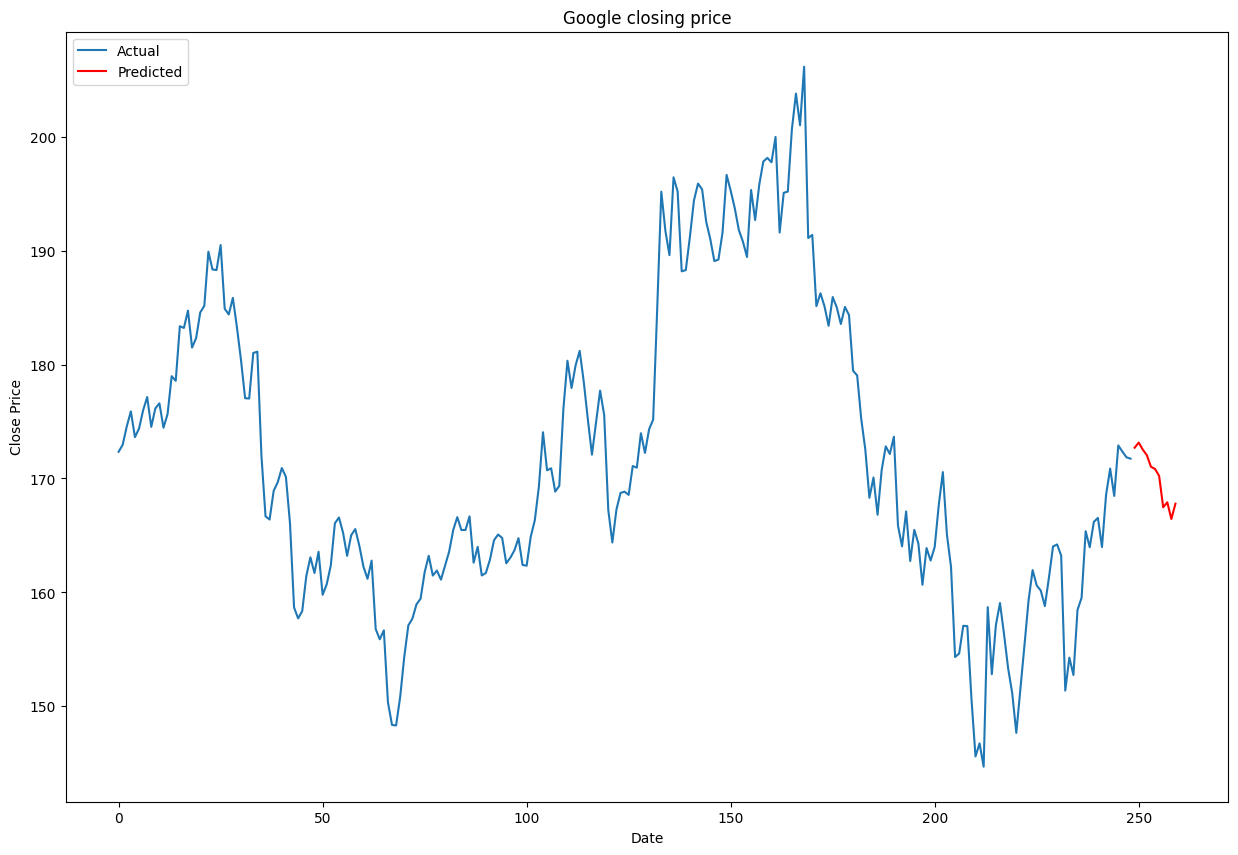

In [31]:
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()


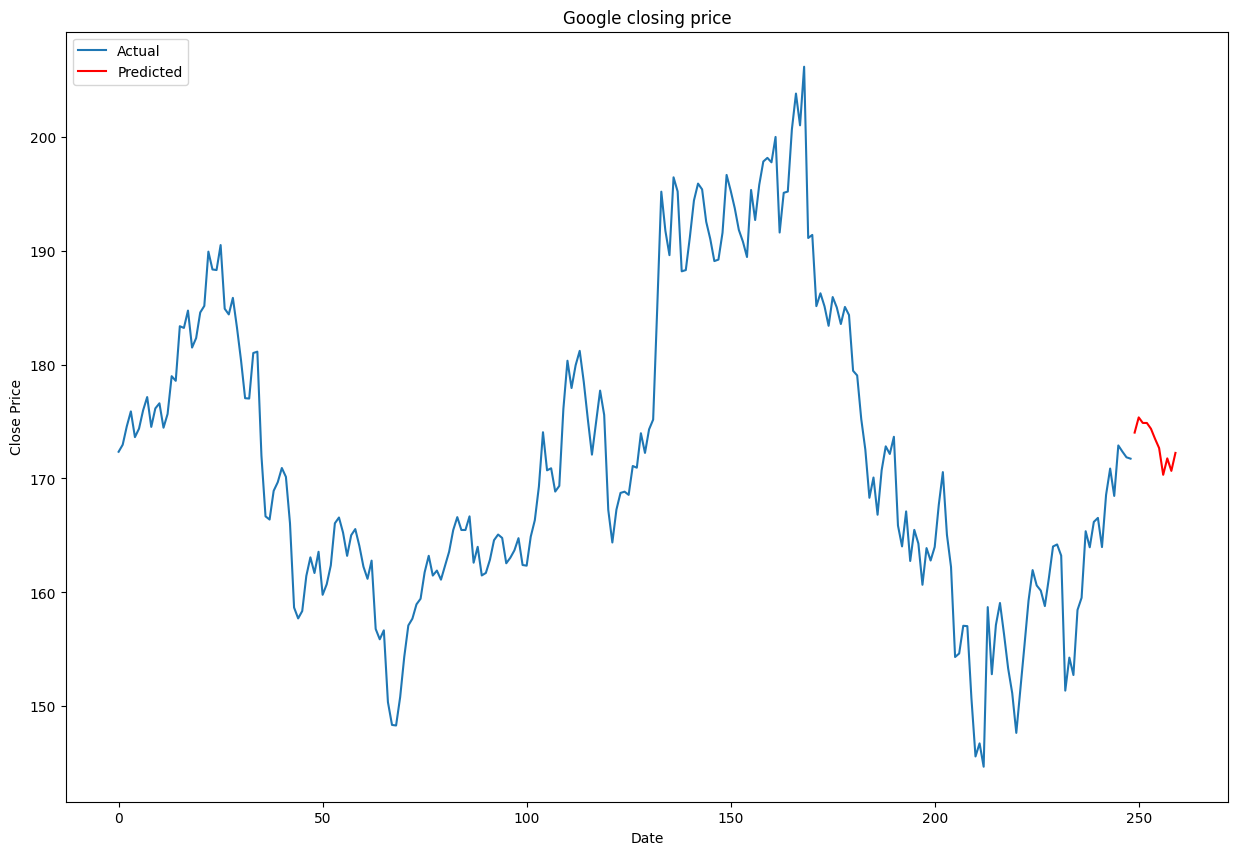

In [32]:
# lets update p, d, q
# let's run SARIMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
# Define p, d, q parameters

p , d, q = 3, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()

# hyper paramter tuning

`Important Note`: This process is taking much more time, if you run the code that take your time, so be careful 

Best SARIMA(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:1209.9713805519832


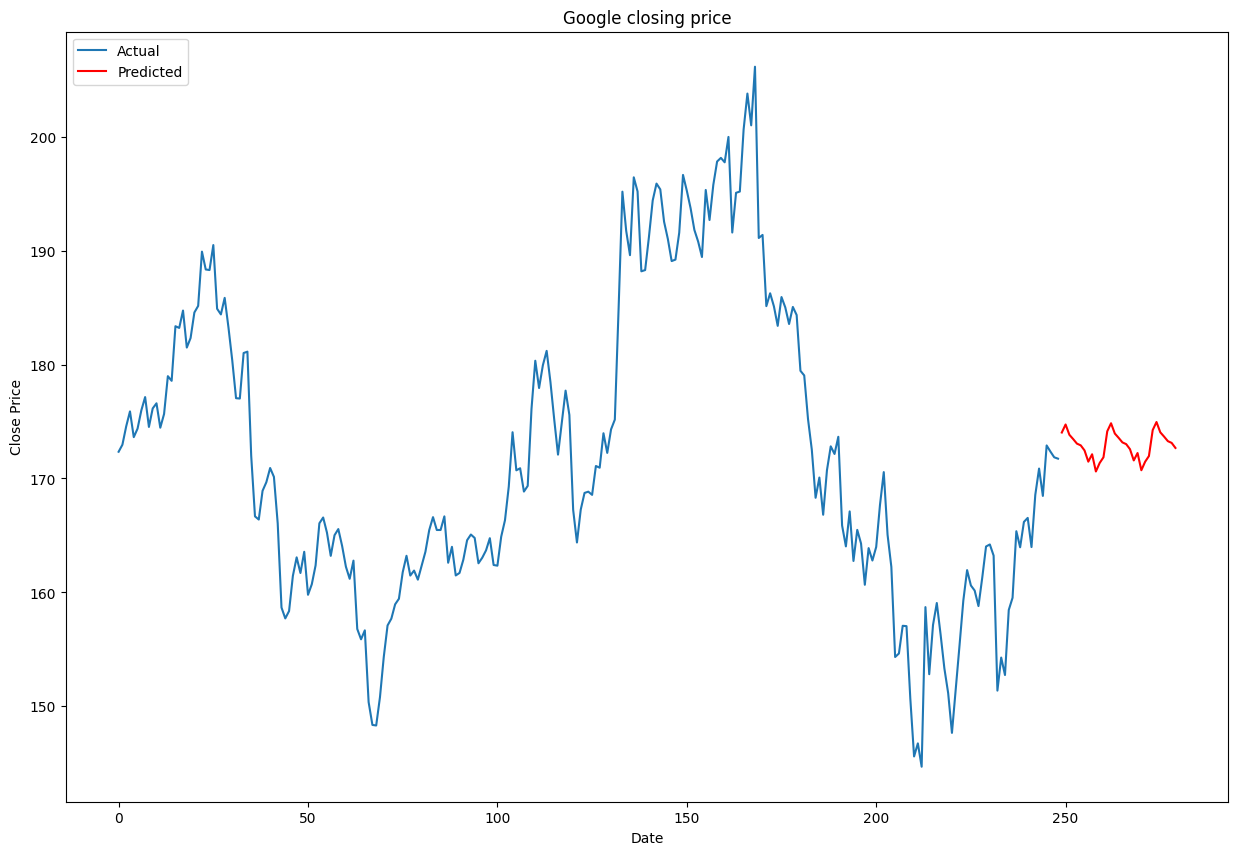

In [34]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

# Assume you have a DataFrame 'df' with your time series data in a column named 'value'
# Assume that the seasonal period of your time series data is 12 (e.g., monthly data)

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q and m quadruplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = SARIMAX(df['Close'],
                                 order = param,
                                 seasonal_order = param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print("Best SARIMA{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

# predict next 30 days
model = SARIMAX(df['Close'],
                order = best_pdq,
                seasonal_order = best_seasonal_pdq,
                enforce_stationarity=False,
                enforce_invertibility=False)
model = model.fit()
predictions = model.predict(len(df['Close']), len(df['Close'])+30)
# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()


In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  249
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -601.986
Date:                            Mon, 02 Jun 2025   AIC                           1209.971
Time:                                    13:42:36   BIC                           1220.179
Sample:                                         0   HQIC                          1214.093
                                            - 249                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0185      0.058     -0.317      0.752      -0.133       0.096
ma.S.L12      -1.0824      0.088    -12.286      0.000      -1.255      -0.910
sigma2        10.5935      1.541      6.876      0.000       7.574      13.613
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                74.59
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.37   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

-----